# Import necessary libraries and load data

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [33]:
df = pd.read_csv('EcommerceCustomers.csv')
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [35]:
df.shape

(500, 8)

In [36]:
df.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [37]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


# Exploratory Data Analysis

In [38]:
df.corr().style.background_gradient(cmap='coolwarm')

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


In [39]:
sns.set_style('white')

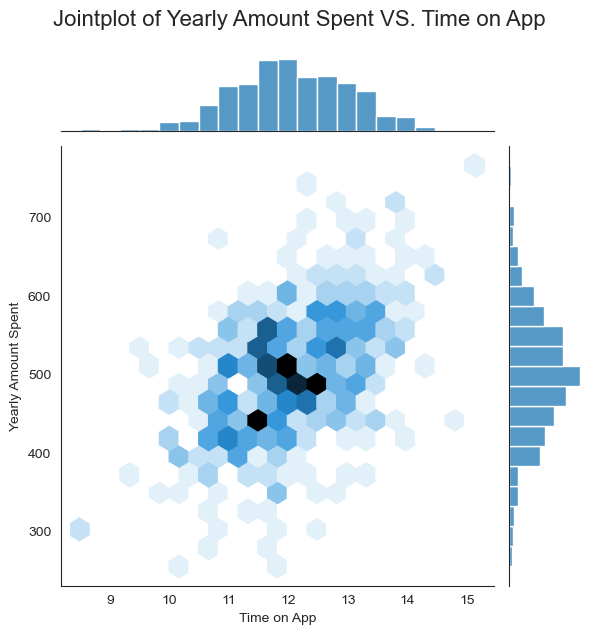

In [40]:
g = sns.jointplot(x='Time on App',
                  y='Yearly Amount Spent',
                  data=df,
                  kind='hex')

g.fig.suptitle('Jointplot of Yearly Amount Spent VS. Time on App', y=1.05, fontsize=16)
plt.show()

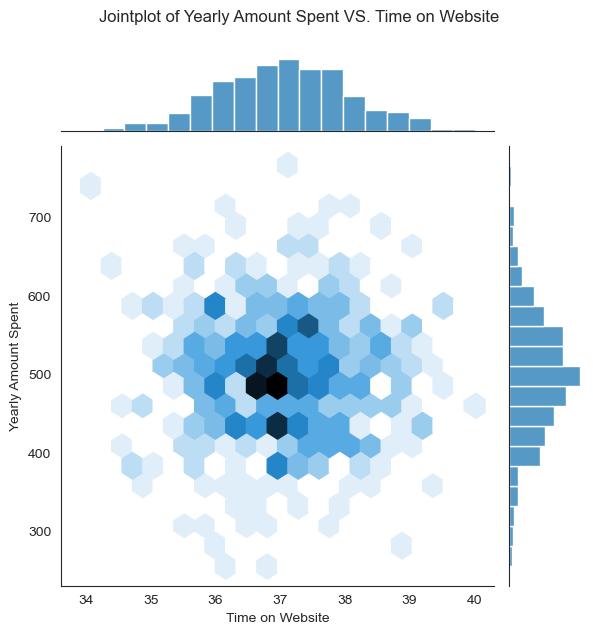

In [41]:
g = sns.jointplot(x='Time on Website',
                  y='Yearly Amount Spent',
                  data=df,
                  kind='hex')

g.fig.suptitle('Jointplot of Yearly Amount Spent VS. Time on Website', y=1.05)
plt.show()

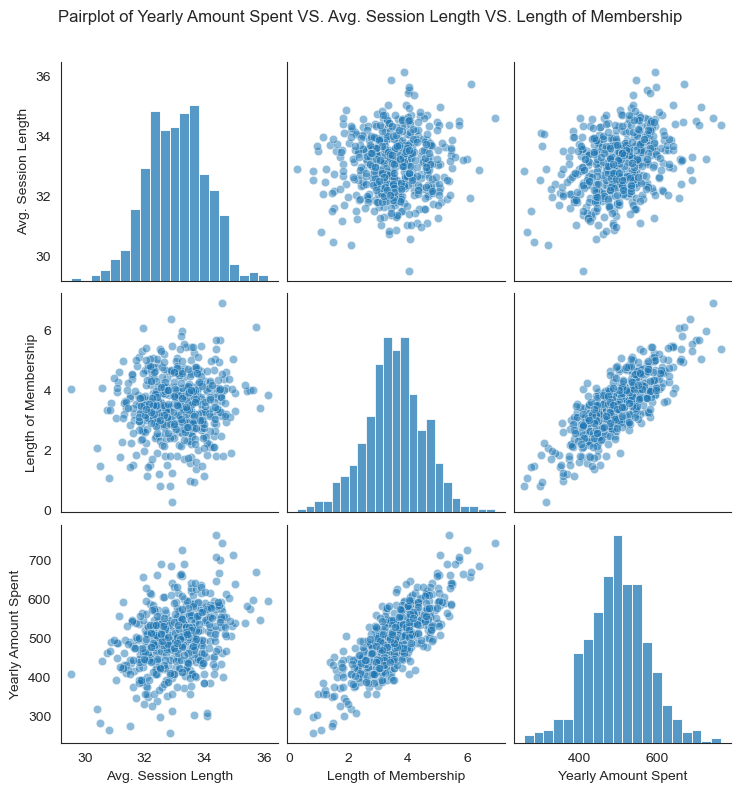

In [42]:
sub_df = df[['Avg. Session Length', 'Length of Membership', 'Yearly Amount Spent']]

g = sns.pairplot(sub_df,
                 kind='scatter',
                 plot_kws={'alpha':0.5})

g.fig.suptitle('Pairplot of Yearly Amount Spent VS. Avg. Session Length VS. Length of Membership', y=1.05)
plt.show()

# Illustrating Linear Regression

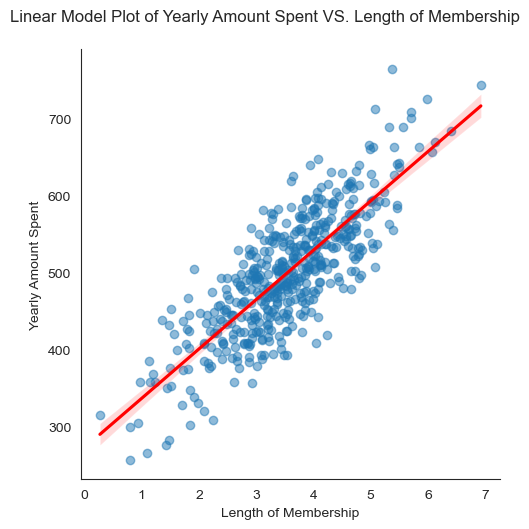

In [43]:
g = sns.lmplot(x='Length of Membership',
               y='Yearly Amount Spent',
               data=df,
               scatter_kws={'alpha':.5},
               line_kws={'color':'red'})

g.fig.suptitle('Linear Model Plot of Yearly Amount Spent VS. Length of Membership', y=1.05)
plt.show()

### Finding Line of Best Fit

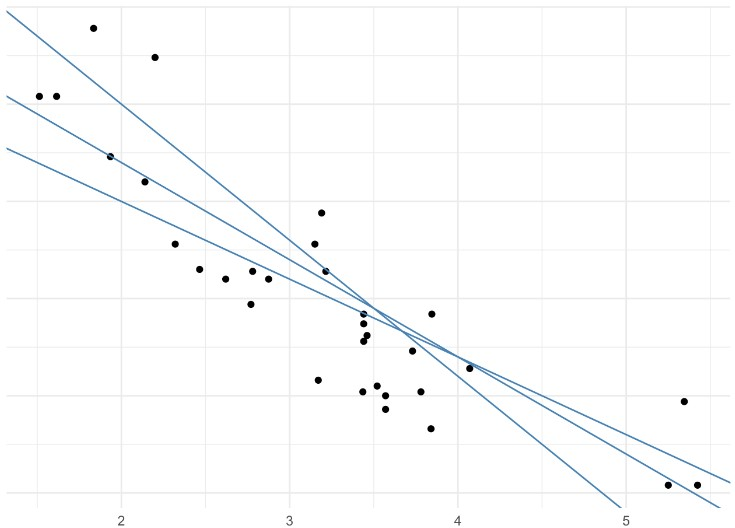

To find the line which passes as close as possible to all the points, we take the square of the vertical distance between each point and each potential line. The line which passes closest to the set of points is the one which minimizes the sum of these squared distances.

### Least Sum of Squares

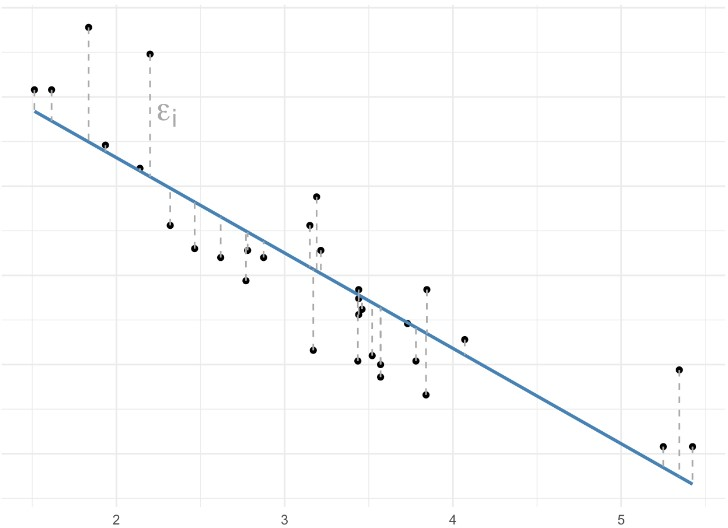

These vertical distances between each observed point and the fitted line determined by the least squares method are called the residuals of the linear regression model and are referred to as error term.

By definition, there is no other line with a smaller total distance between the points and the line. This method is called the least squares method, or OLS for ordinary least squares.

# Equation

The regression model can be written in the form of the equation:

\begin{equation}
Y = \beta_0 + \beta_1 X + \epsilon_i
\end{equation}


with:
- $Y$ the dependent variable
- $X$ the independent variable
- $\beta_0$ the intercept, also sometimes denoted $\alpha$
- $\beta_1$ the slope (the expected increase in $Y$ when $X$ increases by one unit)
- $\epsilon_i$ he residuals (the error term of mean 0 which describes the variations of $Y$ not captured by the model, also referred as the noise)

Multiple linear regression models are defined by the equation:

\begin{equation}
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3 + ... + \beta_n X_n + \epsilon_i
\end{equation}

with:
- $\beta_2$ the slope (the expected increase in $Y$ when $X_2$ increases by one unit)
- $\beta_3$ the slope (the expected increase in $Y$ when $X_3$ increases by one unit)
- $\beta_n$ the slope (the expected increase in $Y$ when $X_n$ increases by one unit)

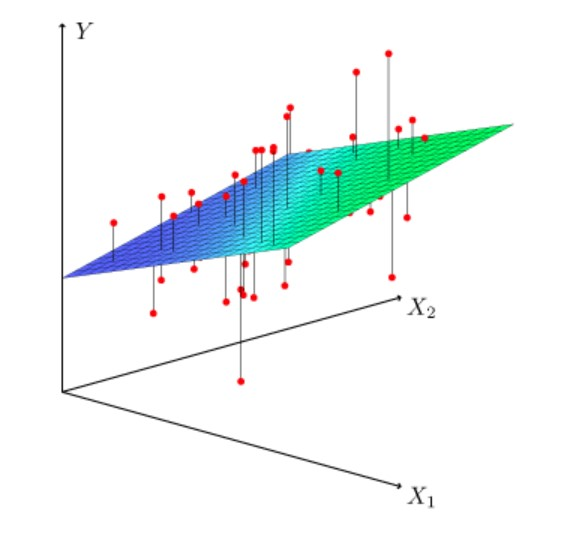

# Split data using Scikit-learn

We will want to test test our model/function after we build it, and we cannot test it with the same data that was used to build it.
Hence we split our data into 2 sets, training and test sets.

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
X

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308
...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573
496,34.702529,11.695736,37.190268,3.576526
497,32.646777,11.499409,38.332576,4.958264
498,33.322501,12.391423,36.840086,2.336485


In [46]:
y = df['Yearly Amount Spent']
y

0      587.951054
1      392.204933
2      487.547505
3      581.852344
4      599.406092
          ...    
495    573.847438
496    529.049004
497    551.620145
498    456.469510
499    497.778642
Name: Yearly Amount Spent, Length: 500, dtype: float64

Remember in Python we can initialize several variables at the same time, like so:

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

We use the **`random_state`** argument and pass it a value (a seed). Using **`train_test_split`** we create a random split. If we ever want the exact same split, we pass in the same **seed** that was passed to **`random_state`**.

In [48]:
X_train

,Avg. Session Length,Time on App,Time on Website,Length of Membership
141,31.851253,12.418962,35.977652,3.251742
383,34.188184,13.130022,35.429334,3.790552
135,33.358398,12.703688,36.100914,2.724108
493,32.060914,12.625433,35.539142,5.412358
122,33.268330,11.113330,37.387946,4.018727
...,...,...,...,...
323,32.762456,10.952353,37.646292,4.019470
192,33.694898,11.202670,35.493964,4.015987
117,33.059264,11.725910,35.999099,5.004821
47,32.726785,12.988510,36.462003,4.113226


In [49]:
X_test

,Avg. Session Length,Time on App,Time on Website,Length of Membership
90,32.491447,12.530357,37.875219,2.476139
254,32.711119,12.326291,36.673878,3.350279
283,33.077731,11.466984,35.675728,1.809230
445,32.212924,11.732991,35.633954,4.331863
461,32.770492,11.371767,35.261498,4.034386
...,...,...,...,...
4,33.330673,12.795189,37.536653,4.446308
318,33.531860,13.665770,36.900221,3.515688
331,32.274594,12.954811,37.108816,3.689917
245,32.980029,11.201160,37.689337,2.412831


# Train the Model

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

# Interpreting Coefficients

In [52]:
lm.coef_

array([ 2.57675297e+01,  3.88003936e+01, -1.80409231e-02,  6.18525679e+01])

In [53]:
coef_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficients'])
coef_df

,Coefficients
Avg. Session Length,25.767530
Time on App,38.800394
Time on Website,-0.018041
Length of Membership,61.852568


# Make Predictions

In [54]:
predictions = lm.predict(X_test)
predictions

array([438.05361824, 489.88569198, 370.69103491, 514.760391  ,
       496.7189217 , 451.55278137, 457.78867583, 336.67939991,
       527.81474016, 663.59455653, 559.9744863 , 526.04623292,
       551.99421026, 456.63948791, 450.23568445, 432.06183962,
       563.23217826, 408.88887454, 599.34396339, 486.90344586,
       715.98855998, 496.94092608, 411.57431473, 555.98451537,
       550.67872493, 398.39939771, 420.89896272, 395.80398185,
       548.01986143, 463.57065873, 558.50166416, 505.04153589,
       505.69744364, 463.9745016 , 425.90773104, 400.61232527,
       503.64365781, 430.32931831, 570.24273703, 422.00772918,
       487.84508367, 602.03000651, 615.86576796, 589.22540325,
       449.89751618, 379.99185043, 558.51374868, 462.84914541,
       502.36523082, 401.25888527, 524.46131262, 416.58817719,
       576.56973214, 477.79844616, 456.89273381, 398.0612513 ,
       564.95710004, 305.11202178, 562.18988371, 477.14131612,
       498.70567984, 434.25965119, 464.87939435, 577.22

# Graphical Evaluation of the Model

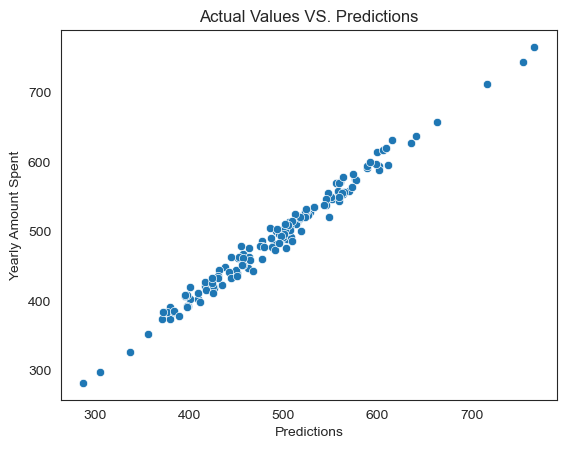

In [55]:
g = sns.scatterplot(x=predictions, y=y_test)
plt.title('Actual Values VS. Predictions')
plt.xlabel('Predictions')
plt.show()

# Analytical Evaluation of the Model

In [56]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score

In [57]:
print('Mean Absolute Error:', mae(y_test, predictions))
print('Mean Squared Error:', mse(y_test, predictions))
print('Root Mean Squared Error:', mse(y_test, predictions, squared=False))
print('R-squared:', r2_score(y_test, predictions))

Mean Absolute Error: 7.851377170861467
Mean Squared Error: 94.55779479273308
Root Mean Squared Error: 9.724083236620976
R-squared: 0.9849262667370622


# Residual Analysis

Linear Regression and some other kinds of models assume that the residuals of your model are going to be normally distributed, i.e., when you make a prediction using Linear Regression, the residuals of the actual value and the predictions ought to be normally distributed.

The residuals are supposed to be random. If they are random, then they will follow a normal distribution.

If this is not so it means that there is something sketchy about the model and it is biased towards something.

In [58]:
residuals = y_test - predictions
residuals

90     11.016701
254    -7.283225
283     3.578640
445    -1.607279
461     6.052153
         ...    
4       7.586005
318    -8.442362
331     9.016131
245    13.913092
5      -3.659746
Name: Yearly Amount Spent, Length: 150, dtype: float64

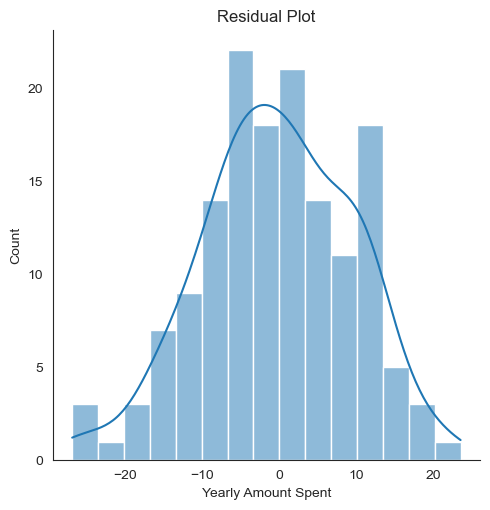

In [59]:
sns.displot(residuals, bins=15, kde=True)
plt.title('Residual Plot')
plt.show()

#### QQ-Plot

In [60]:
import scipy.stats as stats
import pylab

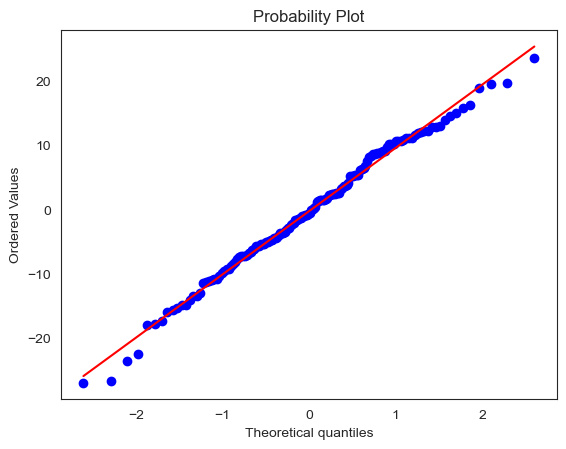

In [61]:
stats.probplot(residuals, dist='norm', plot=pylab)
pylab.show()

In [62]:
joblib.dump(lm, 'model.joblib')

['model.joblib']